# statmodelsで回帰係数を算出

重回帰分析で目的変数の増加をシミュレートしようとしたときに、どのように考えれるのが正しいのか分からなかったので下記サイトのコードを実行して理解できるか試しました。

まとめると、目的変数yが、主要な説明変数が1増加するといくつ増加するかの値coefを算出することで、そのシミュレーションが可能になる。

参考サイト https://robustwife.com/python_statmodels_multi_linear_regression/

コードでは、最初にサイトのコードをそのまま（ただしデータが無かったので抜粋データのみで計算）実行。解説文は参考サイトから引用、一部追加変更した。

In [47]:
import pandas as pd
#データはjupyter notebookのhomeにアップロードする前提で記述。
# sep="\t"はタブ区切り
df = pd.read_csv("robastwife.csv", encoding="utf-8", sep="\t")
df.head()

,id,iv,cnf1,cnf2,outcome_num,treat_num,outcome_ord,time
0,1,0,0.14,0,200.90,0.00,1,0.04
1,2,0,0.41,1,160.37,0.00,1,0.11
2,3,1,-0.07,0,461.07,158.34,3,0.08
3,4,1,-0.25,0,363.76,76.03,2,0.02
4,5,0,0.70,0,290.58,0.00,1,0.02


## statsmodels
線形回帰モデルが扱えるライブラリは沢山ありますが，解析から結果のまとめまでが全て簡単に行えるstatmodelsライブラリを今回は紹介します．
statmodels=https://www.statsmodels.org/

statmodelsライブラリで線形回帰分析を行う際には ols 関数を使います．ols関数においては結果変数と説明変数をそれぞれ指定する必要がありますが，その方法は次の2通りあります．今回は1の方法を採用します．

１．“結果変数 ~ 説明変数1 + 説明変数2” という式 + 利用するデータセット名 を入力する

２．結果変数と説明変数データフレームをそれぞれデータセットから抽出してから入力する

今回は結果変数である outcome_num と説明変数である treat_num の関係について，cnf1, cnf2 という他2つの説明変数の影響を考慮した上で推定してみます．

In [48]:
# statsmodelsライブラリを使える状態にする
import statsmodels.formula.api as smf

# モデルの構築ols(目的変数Y~説明変数X)
results = smf.ols("outcome_num ~ treat_num + cnf1 +cnf2", data=df).fit()

#出力
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            outcome_num   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     12.84
Date:                Wed, 07 Sep 2022   Prob (F-statistic):            0.00508
Time:                        17:10:42   Log-Likelihood:                -49.273
No. Observations:                  10   AIC:                             106.5
Df Residuals:                       6   BIC:                             107.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    245.1455     23.842     10.282      0.000     186.807     303.484
treat_num      1.3873      0.329      4.215      0.006       0.582       2.193
cnf1         -19.0500     17.812     -1.069      0.326     -62.635      24.535
cnf2         -60.0090     42.734     -1.404      0.210    -164.575      44.557
==============================================================================
Omnibus:                        0.069   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.243
Skew:                           0.145   Prob(JB):                        0.886
Kurtosis:                       2.293   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## results の読み方

今回は treat_num という説明変数が outcome_num という結果変数にどの程度提供を与えていたのかを検討する際には，treat_num 行の coef 列を見てください．ここに記載されている数値＝1.3873が treat_num の回帰係数（つまりこれが回帰係数β = coefficient）の推定値です．つまり次のようにに理解できます．

### 「treat_num が１上昇したときにoutcome_numが1.3873上昇する」


また今回は多変量モデルということで，cnf1とcnf2という説明変数についても同時にそれらの影響を推定できていることがわかりますね．

## 視覚化
線形回帰モデルの結果を図示化は seaborn というライブラリを使って簡単に実行できたのですが，多変量の場合には少し工夫が必要です．特にpythonを実務で使いたいという方が躓くことの多いポイントの1つかなと思います．

seabornライブラリで2変数間の線形な関係を図示する際には jointplot 関数を使います．jointplot関数において結果変数yと説明変数xをそれぞれ指定すると，その2変数間の関係を表示してくれます．

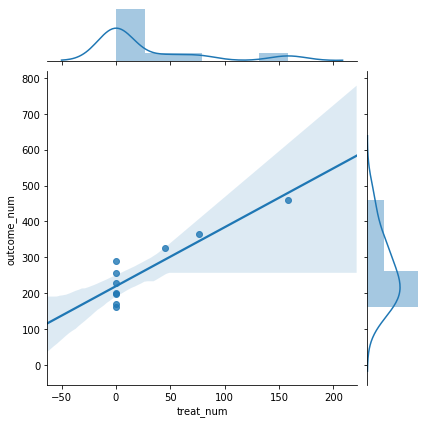

In [49]:
# seabornライブラリを使える状態にする
import seaborn as sns

# outcome_numとtreat_numの線形な関係を可視化する
sns.jointplot(x="treat_num", y="outcome_num", data = df, kind = "reg", scatter = True)

## 予測
線形回帰モデルについて，XのYにおける影響力（あるいは両者の関係性）を知りたい場合は上記で説明した回帰係数推定値を確認すればOKですが，モデルによって結果変数Yの値を予測したいという場合もあります．モデルによって得られた予測値を取得する場合には，以下のコードを実行してください．ここでは予測値と一緒に，推定の誤差範囲を示す指標である95％信頼区間（lower=下限値，upper=上限値）も抽出しています．

In [50]:
# Yの予測値を取得
pred = results.get_prediction()
frame = pred.summary_frame(alpha=0.05)

In [51]:
frame["mean"]

0    242.478488
1    177.325983
2    466.145572
3    355.385134
4    231.810477
5    210.854017
6    225.523970
7    322.893948
8    210.855455
9    211.426956
Name: mean, dtype: float64

In [52]:
frame["mean_ci_lower"]

0    187.890589
1     93.450502
2    369.722912
3    305.253451
4    186.752691
5    126.978536
6    180.484861
7    256.332718
8    150.576207
9    152.022572
Name: mean_ci_lower, dtype: float64

In [53]:
frame["mean_ci_upper"]

0    297.066387
1    261.201464
2    562.568233
3    405.516817
4    276.868262
5    294.729498
6    270.563079
7    389.455177
8    271.134703
9    270.831339
Name: mean_ci_upper, dtype: float64

## scikit learnでの実装方法



In [54]:
# scikit learnライブラリの線形回帰モデルを使える状態にする
from sklearn.linear_model import LinearRegression

# モデルの構築
ols = LinearRegression()

# 目的変数Yと説明変数X
Y = df[["outcome_num"]].values
X = df[["treat_num"]].values

# モデル推定
ols.fit(X,Y)

# 回帰係数を出力
ols.coef_

array([[1.64305167]])

## 参考

元サイトにあった解説を付した図です。

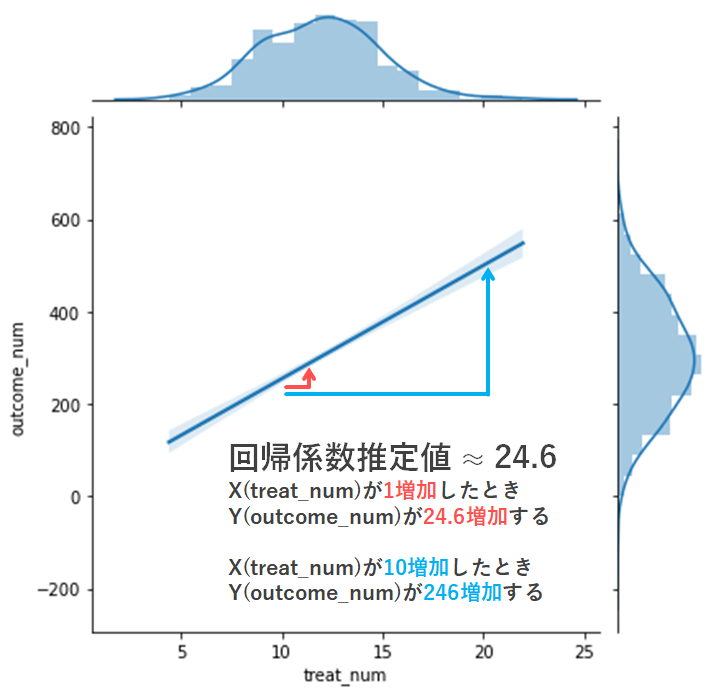

In [65]:
print(results.params)

Intercept    245.145491
treat_num      1.387309
cnf1         -19.050020
cnf2         -60.009000
dtype: float64


In [71]:
b = results.params['Intercept']

In [72]:
a = results.params['treat_num']

In [79]:
print("y = ax + b")
print("y = " + str(a) + " x + " + str(b))

y = ax + b
y = 1.3873094618038775 x + 245.1454907386267
